# K-Nearest Neighbour

Implementasi Model KNN pada file Decision Tree -> drug200.csv

---



In [2]:
!pip install scikit-learn==0.23.1

  Using cached scikit-learn-0.23.1.tar.gz (7.2 MB)
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [4]:
df = pd.read_csv('drug200.csv')
df.head()

,umur,jk,imt,kolestrol,kandungan,minuman
0,23,F,HIGH,HIGH,25.355,5
1,47,M,LOW,HIGH,13.093,3
2,47,M,LOW,HIGH,10.114,3
3,28,F,NORMAL,HIGH,7.798,4
4,61,F,LOW,HIGH,18.043,5


Kode df = pd.read_csv('drug200.csv') digunakan untuk membaca file CSV dengan nama drug200.csv dan mengimpornya ke dalam sebuah DataFrame df. Fungsi head() akan menampilkan lima baris pertama dari DataFrame tersebut untuk memberikan gambaran tentang struktur data yang terdapat dalam file CSV tersebut.

In [6]:
df['umur'].value_counts()

,count
umur,
47,8
23,7
28,7
49,7
32,6
39,6
50,5
60,5
22,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   umur       200 non-null    int64  
 1   jk         200 non-null    object 
 2   imt        200 non-null    object 
 3   kolestrol  200 non-null    object 
 4   kandungan  200 non-null    float64
 5   minuman    200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


array([[<Axes: title={'center': 'umur'}>]], dtype=object)

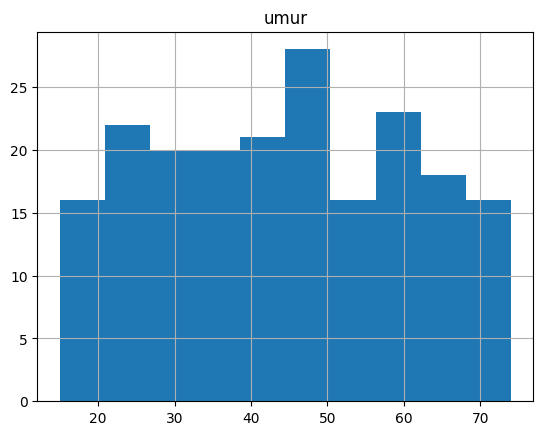

In [9]:
df.hist(column="umur",bins=10)

array([[<Axes: title={'center': 'umur'}>]], dtype=object)

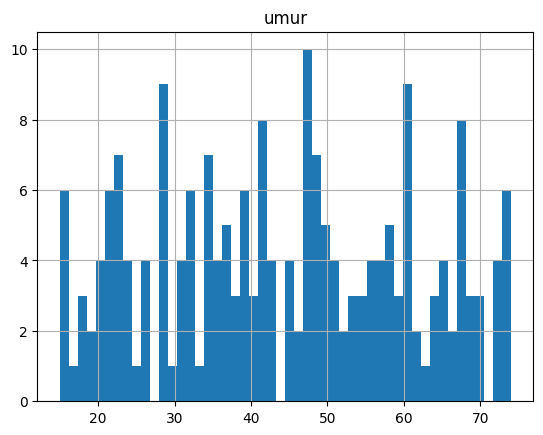

In [10]:
df.hist(column='umur', bins=50)

In [11]:
df.columns

Index(['umur', 'jk', 'imt', 'kolestrol', 'kandungan', 'minuman'], dtype='object')

In [12]:
X = df[['umur', 'jk', 'imt', 'kolestrol', 'kandungan', 'minuman']] .values  #.astype(float)
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355, 5],
       [47, 'M', 'LOW', 'HIGH', 13.093, 3],
       [47, 'M', 'LOW', 'HIGH', 10.114, 3],
       [28, 'F', 'NORMAL', 'HIGH', 7.798, 4],
       [61, 'F', 'LOW', 'HIGH', 18.043, 5]], dtype=object)

In [13]:
y = df['umur'].values
y[0:5]

array([23, 47, 47, 28, 61])

In [16]:
label_cols = ['jk', 'imt', 'kolestrol']
for col in label_cols:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df.values

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

print(X[0:5])

[[-1.29159102 -1.040833   -1.11016894 -0.97043679  1.28652212  0.82565376]
 [ 0.16269866  0.96076892  0.10979693 -0.97043679 -0.4151454  -0.63568033]
 [ 0.16269866  0.96076892  0.10979693 -0.97043679 -0.82855818 -0.63568033]
 [-0.988614   -1.040833    1.32976279 -0.97043679 -1.14996267  0.09498672]
 [ 1.0110343  -1.040833    0.10979693 -0.97043679  0.27179427  0.82565376]]


Label Encoding:
Untuk kolom-kolom jk, imt, dan kolestrol, kode ini melakukan Label Encoding yang mengubah nilai kategorikal (seperti 'M' atau 'F' untuk kolom jk, atau 'HIGH', 'LOW' untuk kolom kolestrol) menjadi nilai numerik. Fungsi LabelEncoder() digunakan untuk menggantikan setiap kategori dengan angka yang sesuai. Sebagai contoh, 'F' bisa diubah menjadi 0, dan 'M' menjadi 1.

Standard Scaler:
Setelah encoding, langkah berikutnya adalah scaling data, yang dilakukan dengan StandardScaler(). Ini bertujuan untuk menormalkan data dengan cara mengubahnya menjadi distribusi dengan mean 0 dan standar deviasi 1. Proses ini penting untuk banyak model machine learning, seperti KNN atau SVM, yang sensitif terhadap skala data.

Menampilkan 5 Baris Pertama:
Pada akhir kode, Anda mencoba untuk menampilkan 5 baris pertama dari data yang telah di-scaling dengan X[0:5].

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 6) (160,)
Test set: (40, 6) (40,)


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
k = 8
#Train Model and Predict
model_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
model_knn

KNeighborsClassifier(n_neighbors=8)

In [25]:
yhat = model_knn.predict(X_test)
yhat[0:5]

array([16, 16, 20, 58, 41])

In [26]:
y_test[0:5]

array([34, 15, 47, 73, 47])

In [27]:
from sklearn import metrics

# Evaluasi akurasi model KNN
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.20625
Test set Accuracy:  0.05


Dari output yang diberikan, akurasi pada data training dan testing sangat rendah, yakni:

Train set Accuracy: 0.20625

Test set Accuracy: 0.05

Ini menunjukkan bahwa model KNN (K-Nearest Neighbors) yang Anda latih tidak melakukan prediksi dengan baik

# Decision Tree

Implementasi Model Decision Tree pada file KNN -> teleCust1000t.csv

---

In [28]:
!pip install scikit-learn==0.23.1

  Using cached scikit-learn-0.23.1.tar.gz (7.2 MB)
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user


In [29]:
import sys
import numpy as np
import pandas as pd
import sklearn.tree as tree

In [30]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,daerah,masa_jabatan,umur,perkawinan,alamat,income,pendidikan,pekerjaan,pensiun,jk,tinggal,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


In [31]:
df['income'].value_counts()

,count
income,
25,24
26,22
41,22
33,20
46,19
...,...
333,1
288,1
269,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   daerah        1000 non-null   int64
 1   masa_jabatan  1000 non-null   int64
 2   umur          1000 non-null   int64
 3   perkawinan    1000 non-null   int64
 4   alamat        1000 non-null   int64
 5   income        1000 non-null   int64
 6   pendidikan    1000 non-null   int64
 7   pekerjaan     1000 non-null   int64
 8   pensiun       1000 non-null   int64
 9   jk            1000 non-null   int64
 10  tinggal       1000 non-null   int64
 11  custcat       1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


In [33]:
import matplotlib.pyplot as plt

In [36]:
# Tabulasi data
tabulasi_inc = df['income'].value_counts().reset_index()
tabulasi_inc.columns = ['Kategori', 'Jumlah']  # Menamai kolom
print(tabulasi_inc)

     Kategori  Jumlah
0          25      24
1          26      22
2          41      22
3          33      20
4          46      19
..        ...     ...
213       333       1
214       288       1
215       269       1
216       190       1
217       944       1

[218 rows x 2 columns]


Saya melakukan tabulasi data pada kolom "income" menggunakan value_counts() untuk menghitung jumlah setiap kategori income. Kemudian, saya mereset indeks dan menamai ulang kolom menjadi "Kategori" dan "Jumlah" agar lebih mudah dipahami. Hasil tabulasi ini memberikan jumlah setiap kategori income yang ada dalam dataset.

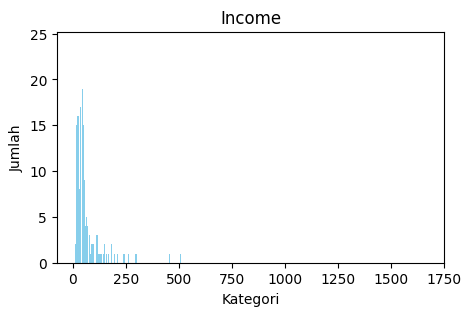

In [37]:
# Membuat bar chart
plt.figure(figsize=(5, 3))  # Mengatur ukuran gambar
plt.bar(tabulasi_inc['Kategori'], tabulasi_inc['Jumlah'], color='skyblue')  # Membuat bar chart
plt.xlabel('Kategori')  # Label sumbu X
plt.ylabel('Jumlah')  # Label sumbu Y
plt.title('Income')  # Judul
plt.show()  # Menampilkan grafik

Saya membuat grafik batang menggunakan Matplotlib untuk menampilkan jumlah pendapatan berdasarkan kategori. Pertama, saya mengatur ukuran grafik, kemudian menggunakan plt.bar() untuk menggambarkan hubungan antara kategori dan jumlah. Sumbu X diberi label "Kategori" dan sumbu Y diberi label "Jumlah". Grafik ini saya beri judul "Income" dan ditampilkan dengan plt.show(). Hasilnya adalah grafik yang menggambarkan distribusi pendapatan berdasarkan kategori.

In [39]:
# Tabulasi data
tabulasi_pekerjaan = df['pekerjaan'].value_counts().reset_index()
tabulasi_pekerjaan.columns = ['Kategori', 'Jumlah']  # Menamai kolom
print(tabulasi_pekerjaan)

    Kategori  Jumlah
0          0     106
1          1      66
2          2      59
3          5      54
4          4      52
5          3      50
6          7      48
7          6      44
8          9      39
9          8      38
10        11      34
11        12      32
12        15      30
13        10      30
14        13      28
15        21      22
16        20      20
17        18      20
18        22      20
19        19      19
20        25      17
21        16      17
22        17      16
23        24      14
24        23      14
25        14      13
26        27      10
27        29       9
28        31       9
29        35       9
30        26       8
31        30       8
32        33       7
33        37       5
34        28       5
35        34       4
36        36       4
37        40       3
38        32       3
39        43       3
40        39       3
41        41       2
42        44       2
43        45       2
44        47       1
45        38       1


Saya melakukan tabulasi data pada kolom "pekerjaan" menggunakan value_counts() untuk menghitung jumlah setiap kategori pekerjaan. Kemudian, saya mereset indeks dan menamai ulang kolom menjadi "Kategori" dan "Jumlah". Hasil tabulasi ini memberikan jumlah setiap kategori pekerjaan yang ada dalam dataset.

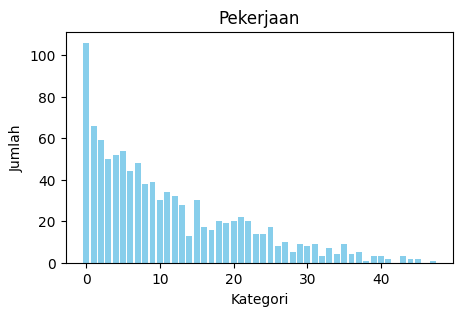

In [40]:
# Membuat bar chart
plt.figure(figsize=(5, 3))  # Mengatur ukuran gambar
plt.bar(tabulasi_pekerjaan['Kategori'], tabulasi_pekerjaan['Jumlah'], color='skyblue')  # Membuat bar chart
plt.xlabel('Kategori')  # Label sumbu X
plt.ylabel('Jumlah')  # Label sumbu Y
plt.title('Pekerjaan')  # Judul
plt.show()  # Menampilkan grafik

Bar chart yang saya buat menggunakan plt.bar() ini bertujuan untuk memvisualisasikan jumlah kategori pekerjaan yang ada dalam dataset. Dengan label sumbu X sebagai kategori pekerjaan dan sumbu Y sebagai jumlah setiap kategori, grafik ini memudahkan dalam melihat distribusi frekuensi masing-masing kategori pekerjaan. Gambar ini akan menunjukkan gambaran sebaran data pekerjaan secara visual.

In [41]:
df.columns

Index(['daerah', 'masa_jabatan', 'umur', 'perkawinan', 'alamat', 'income',
       'pendidikan', 'pekerjaan', 'pensiun', 'jk', 'tinggal', 'custcat'],
      dtype='object')

In [42]:
X = df[['daerah', 'masa_jabatan', 'umur', 'perkawinan', 'alamat', 'income', 'pendidikan', 'pekerjaan', 'pensiun', 'jk', 'tinggal', 'custcat']] .values  #.astype(float)
X[0:5]

array([[  2,  13,  44,   1,   9,  64,   4,   5,   0,   0,   2,   1],
       [  3,  11,  33,   1,   7, 136,   5,   5,   0,   0,   6,   4],
       [  3,  68,  52,   1,  24, 116,   1,  29,   0,   1,   2,   3],
       [  2,  33,  33,   0,  12,  33,   2,   0,   0,   1,   1,   1],
       [  2,  23,  30,   1,   9,  30,   1,   2,   0,   0,   4,   3]])

Saya mengambil kolom-kolom yang relevan dari dataset, seperti 'daerah', 'masa_jabatan', 'umur', dan lainnya, untuk membentuk array X. Data tersebut digunakan untuk fitur pelatihan pada model. Output yang terlihat menunjukkan nilai numerik untuk masing-masing fitur yang telah dipilih, di mana setiap baris merepresentasikan satu entri atau individu, dan setiap kolom adalah nilai untuk fitur yang bersangkutan.

In [44]:
y = df['masa_jabatan'].values
y[0:5]

array([13, 11, 68, 33, 23])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_tes, y_train, y_tes = train_test_split(X, y, test_size=0.3, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_tes.shape,  y_tes.shape)

Train set: (700, 12) (700,)
Test set: (300, 12) (300,)


In [46]:
y_tes

array([49,  5, 18, 72, 26, 33, 37, 32, 18,  6, 18, 31, 46, 11, 69, 29, 53,
       56,  8, 41, 64, 14, 41, 51, 68, 10, 62, 24, 65, 34, 33, 23, 50, 24,
       14, 37, 67,  9, 47, 11,  6, 33, 38, 36, 24, 51, 50, 17, 69,  4, 32,
       21, 19, 12, 42, 30, 42, 31, 11, 60,  9, 15, 25,  9, 16, 71, 48, 25,
        2,  3, 67, 56, 38, 53, 35, 72, 29, 56, 65, 19, 12, 25, 65, 43,  2,
       60, 59, 34, 48, 46, 32, 72, 42, 50, 24, 33, 39,  5, 31, 25, 60, 35,
       36, 72, 18, 72, 52, 56, 48, 64, 24, 66, 69, 58, 39, 32, 32, 24, 44,
       55, 37, 21, 59, 49, 43, 29, 16, 38,  4,  7, 18,  4, 13, 13, 25, 46,
        4,  1, 32,  2, 67, 10, 26, 45, 64, 21, 72, 28, 23, 60, 62, 40, 41,
       22, 48, 43, 21,  7, 72, 17, 50, 70, 33, 13, 33,  9,  3, 19, 35, 37,
       15, 39, 41, 44, 23, 65, 53, 67, 33, 25, 40, 46, 10,  8, 56, 60, 37,
       10, 65, 48,  1,  9, 20, 13, 72, 60, 30, 13, 34, 72, 67, 69, 24, 71,
       72, 19, 72, 70, 22, 12,  4, 49, 23, 30, 17, 42,  3, 32, 63, 53, 71,
       24,  1, 69, 15, 54

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [49]:
predTree = model_dt.predict(X_tes)
predTree[0:5]

array([49,  5, 18, 72, 26])

Saya menggunakan model Decision Tree yang telah dilatih untuk melakukan prediksi pada data uji (X_tes). Hasil prediksi menunjukkan angka-angka yang mewakili kelas atau kategori yang diprediksi untuk setiap entri pada data uji. Contohnya, prediksi untuk lima entri pertama adalah 49, 5, 18, 72, dan 26.

In [50]:
print (predTree[0:5])
print (y_tes[0:5])

[49  5 18 72 26]
[49  5 18 72 26]


Saya mencetak hasil prediksi model Decision Tree untuk lima data pertama, yang menunjukkan angka-angka kelas yang diprediksi, yaitu [49, 5, 18, 72, 26]. Hasilnya sama dengan nilai aktual dari data uji (y_tes) untuk lima entri pertama, yang juga menunjukkan kelas yang sama, yaitu [49, 5, 18, 72, 26], yang berarti model berhasil memprediksi dengan akurat.

In [51]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_tes, predTree))

DecisionTrees's Accuracy:  1.0


Hasil output "DecisionTree's Accuracy: 1.0" menunjukkan bahwa model Decision Tree berhasil mengklasifikasikan data uji (testing) dengan akurasi 100%. Ini berarti bahwa model memprediksi semua data uji dengan benar tanpa kesalahan.

Namun, akurasi 100% ini juga bisa menandakan bahwa model mungkin mengalami overfitting, yaitu model terlalu menyesuaikan diri dengan data pelatihan sehingga memprediksi data uji dengan sangat baik, tetapi mungkin tidak mampu menangani data baru yang lebih beragam. Hal ini bisa terjadi jika model terlalu kompleks atau jika jumlah fitur yang digunakan terlalu banyak.